Number recognition using MNIST dataset is one of the project made with the help of Neural Network. It basically detects the scanned images of digits.Using TensorFlow, an open-source Python library developed by the Google Brain labs for deep learning research, you will take images of the numbers 0-9 and build and train a neural network to recognize and predict the correct label for the digit displayed.

# **Import Required Libraries**

Python modules can get access to code from another module by importing the file/function using import. The import statement is the most common way of invoking the import machinery.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

# **Downloading dataset from tenserflow library**

The dataset we will be using in this tutorial is called the MNIST dataset, and it is a classic in the machine learning community. This dataset is made up of images of handwritten digits, 28x28 pixels in size. Here are some examples of the digits included in the dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# **Data Reshaping**

The reshape() function shapes an array without changing the data of the array.

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
x_train /= 255
x_test /= 255

# **Building the Model**

In [ ]:

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.5254 - accuracy: 0.8534
Epoch 2/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2351 - accuracy: 0.9301
Epoch 3/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1845 - accuracy: 0.9459
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1554 - accuracy: 0.9544
Epoch 5/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1376 - accuracy: 0.9585


# **Model Testing**

In [ ]:
index = int(input('Enter image index number(max 10000): '))

Enter image index number(max 10000): 12


1/1 [==============================] - 0s 25ms/step
9


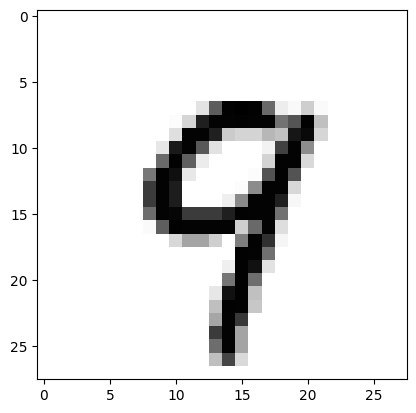

In [ ]:
plt.imshow(x_test[index].reshape(28, 28),cmap='Greys')
predict = x_test[index].reshape(28,28)
pred = model.predict(x_test[index].reshape(1, 28, 28, 1))
print(pred.argmax())

# **Model Evaluation**

We would evaualte our model by calculating the accuracy of the model using testing dataset.

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1045 - accuracy: 0.9670


[0.10454868525266647, 0.9670000076293945]